## Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Reshape
#from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

## Reading the resized images

In [2]:
file = open('img_x_train.pkl','rb')

resized_img_Xtrain = pickle.load(file)

file.close()
file = open('img_y_train.pkl','rb')

resized_img_Ytrain = pickle.load(file)

file.close()
file = open('img_x_test.pkl','rb')

resized_img_Xtest = pickle.load(file)

file.close()
file = open('img_y_test.pkl','rb')

resized_img_Ytest = pickle.load(file)

file.close()
file = open('img_x_val.pkl','rb')

resized_img_Xval = pickle.load(file)

file.close()
file = open('img_y_val.pkl','rb')

resized_img_Yval = pickle.load(file)

file.close()

## Normalizing the images

In [3]:
train_x = np.array(resized_img_Ytrain)
train_x = train_x/255.0
test_x = np.array(resized_img_Ytest)
test_x = test_x/255.0
val_x = np.array(resized_img_Yval)
val_x = val_x/255.0
train_x_px = np.array(resized_img_Xtrain)
train_x_px = train_x_px/255.0
test_x_px = np.array(resized_img_Xtest)
test_x_px = test_x_px/255.0
val_x_px = np.array(resized_img_Xval)
val_x_px = val_x_px/255.0

## Autoencoder - Fully connected 1 Low risk

In [ ]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))
encoder.add(Dense(4800,activation="relu"))
encoder.add(Dense(2400,activation="relu"))
encoder.add(Dense(1200,activation="relu"))
encoder.add(Dense(600,activation="relu"))


decoder = Sequential()

decoder.add(Dense(1200,input_shape=[600],activation='relu'))
decoder.add(Dense(2400,activation='relu'))
decoder.add(Dense(4800,activation='relu'))
decoder.add(Dense(9600,activation='relu'))
decoder.add(Dense(80*80*3,activation='sigmoid',input_shape = [9600]))
decoder.add(Reshape([80,80,3]))

full_autoencoder = Sequential([encoder,decoder])

full_autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

full_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [ ]:
predictions = simple_autoencoder.predict(test_x_px)

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Autoencoder - Fully connected 2 Low risk

In [53]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))



decoder = Sequential()

decoder.add(Dense(80*80*3,input_shape=[9600],activation='sigmoid'))

decoder.add(Reshape([80,80,3]))

simple_autoencoder = Sequential([encoder,decoder])
simple_autoencoder.compile(optimizer='adam', loss='mse')



In [54]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

simple_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=64,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

Epoch 1/50


2023-02-06 18:24:48.525270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.0465

2023-02-06 18:26:25.924944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 100s 199ms/step - loss: 0.0465 - val_loss: 0.0398
Epoch 2/50
469/469 [==============================] - 90s 189ms/step - loss: 0.0365 - val_loss: 0.0358
Epoch 3/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0328 - val_loss: 0.0323
Epoch 4/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0308 - val_loss: 0.0307
Epoch 5/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0293 - val_loss: 0.0295
Epoch 6/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0285 - val_loss: 0.0299
Epoch 7/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0273 - val_loss: 0.0287
Epoch 8/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0268 - val_loss: 0.0278
Epoch 9/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0261 - val_loss: 0.0270
Epoch 10/50
469/469 [==============================] - 89s 189ms/step - loss: 0.026

In [55]:
simple_autoencoder.save('simple_auto_layer.h5')

In [56]:
predictions = simple_autoencoder.predict(test_x_px)

 1/94 [..............................] - ETA: 11s

2023-02-06 19:02:21.317186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 20ms/step


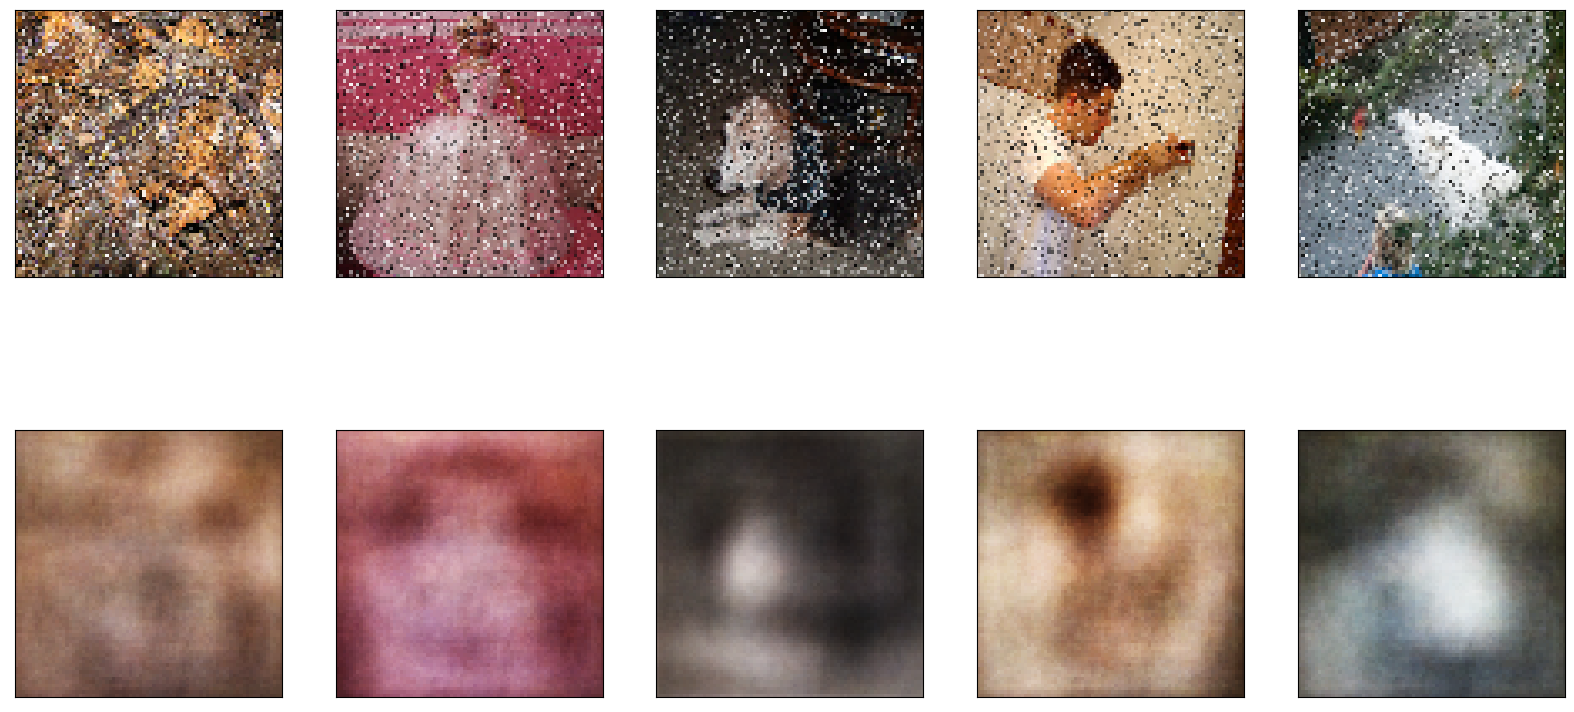

In [57]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
simple_autoencoder.save('simple_autoencoder.h5')

### Convulation encoder Medium risk

In [4]:
Input_img = Input(shape=(80, 80, 3))  
   
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


Metal device set to: Apple M1 Pro


2023-02-06 15:53:13.328935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-06 15:53:13.330024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=128,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

Epoch 1/50


2023-02-06 15:53:45.995876: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-06 15:53:46.738166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.0185

2023-02-06 15:58:42.206253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 305s 324ms/step - loss: 0.0185 - val_loss: 0.0079
Epoch 2/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 3/50
938/938 [==============================] - 335s 357ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 4/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 5/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 6/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 7/50
938/938 [==============================] - 333s 354ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 8/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 9/50
938/938 [==============================] - 333s 355ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 10/50
938/938 [==============================] - 333s 355ms/step - lo

In [6]:
autoencoder.save('conv_auto.h5')

In [7]:
predictions = autoencoder.predict(test_x_px)

 1/94 [..............................] - ETA: 19s

2023-02-06 18:01:34.302037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 11s 120ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


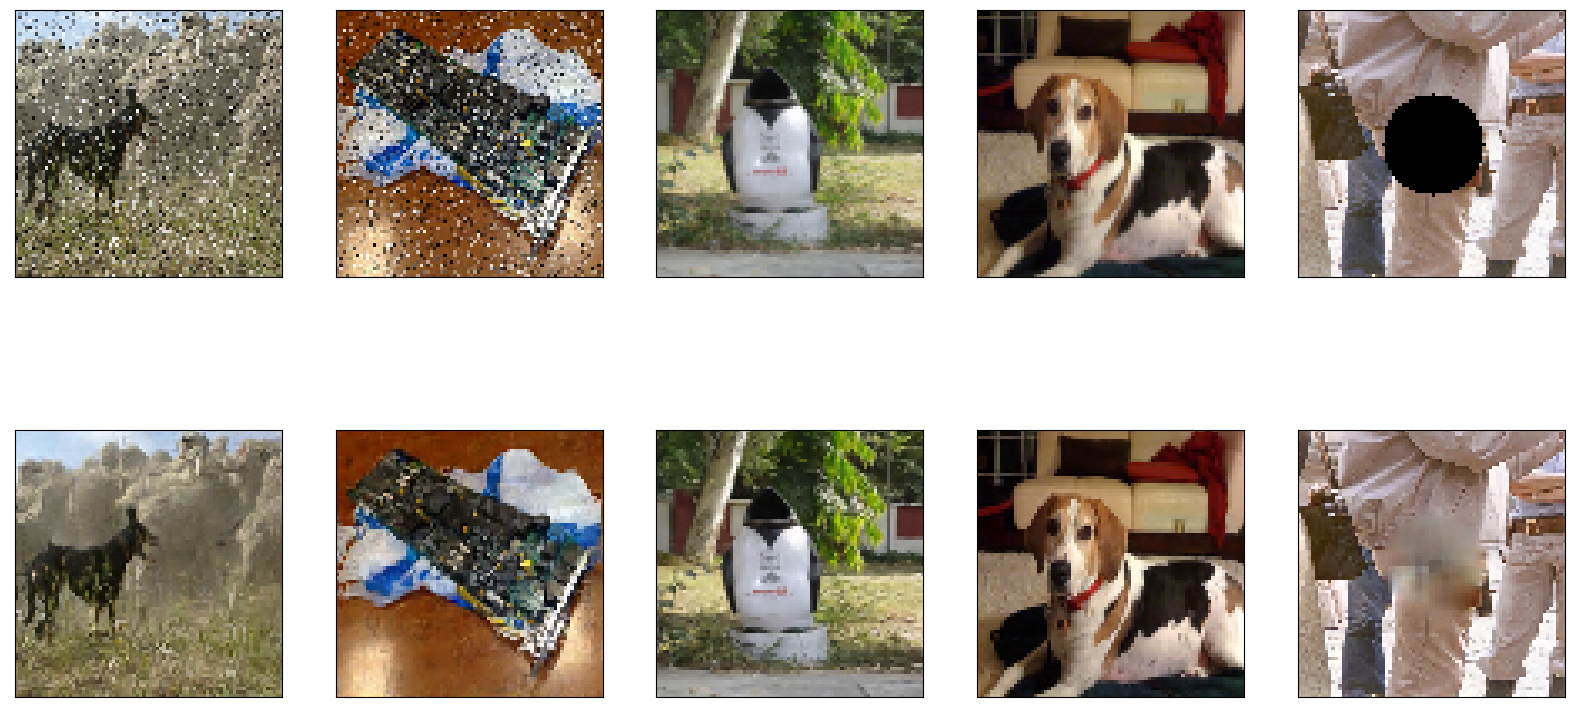

In [34]:
n = 5
plt.figure(figsize= (20,10))
images = [0,15,1899,1738,2001]
j = 0
for i in images:
    
  ax = plt.subplot(2, n, j+1)
  plt.imshow(test_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, j+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  j = j + 1

plt.show()

In [84]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        36928     
                                                             

In [85]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=a4bff2c8c1997abb7415ccdb2d0e37b4216dea4cb6982b8512bde25b91a57c51
  Stored in directory: /Users/faizkhwaja/Library/Caches/pip/wheels/5c/94/1f/953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [88]:
tf.keras.utils.plot_model(autoencoder)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [78]:
predictions = simple_auto.predict(test_x_px)

2023-02-06 19:16:03.397315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 3s 26ms/step


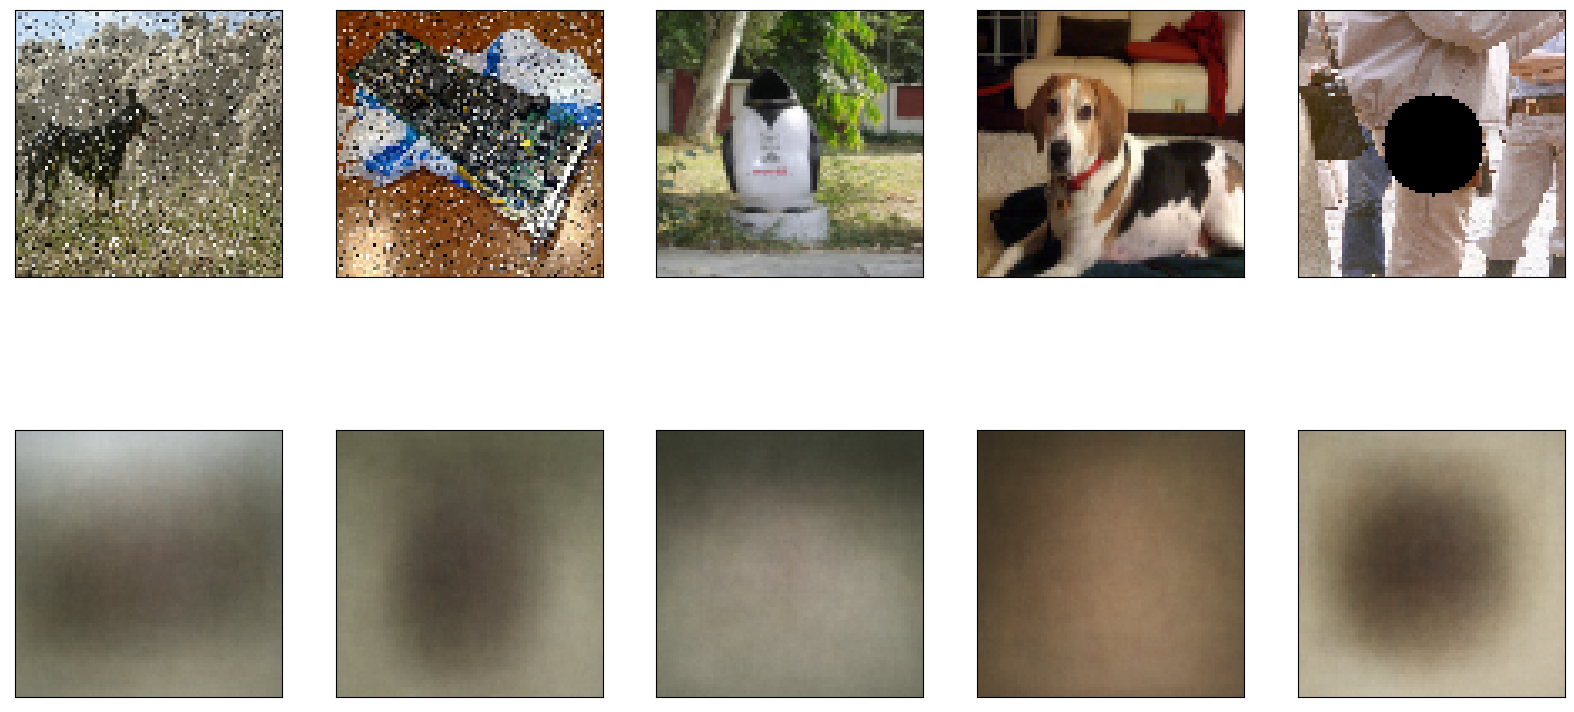

In [47]:
n = 5
plt.figure(figsize= (20,10))
images = [0,15,1899,1738,2001]
j = 0
for i in images:
    
  ax = plt.subplot(2, n, j+1)
  plt.imshow(test_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, j+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  j = j + 1

plt.show()